<a href="https://colab.research.google.com/github/AliEbadi110/Tabular-Data-Classification-Sample-Projects/blob/main/Tabular_Data_Scikit_Learn_Multi_Class_Classification_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tabular Data - Scikit Learn - Multi Class Classification - Iris**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 1. Loading Data

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Data Overview

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


## 3. Exploratory Data Analysis

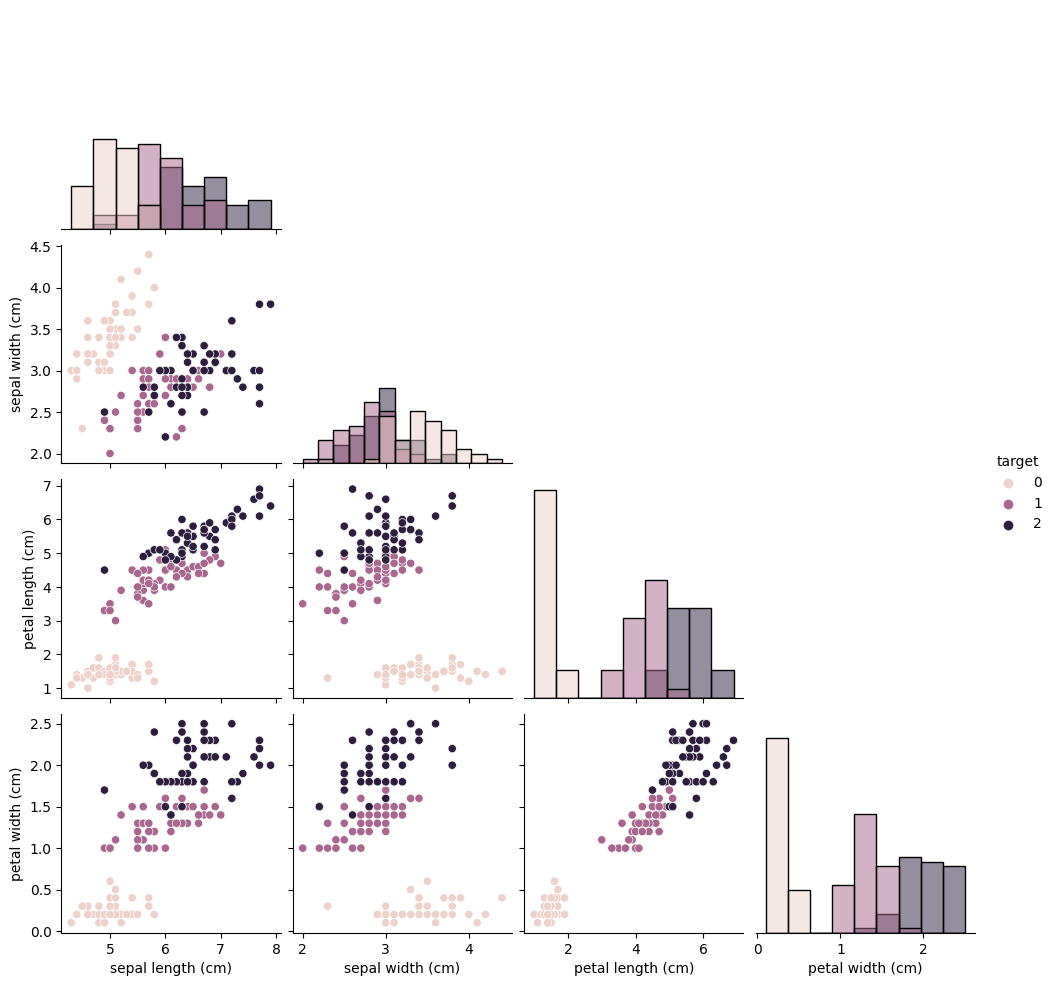

In [ ]:
sns.pairplot(data=df, hue='target', diag_kind="hist", corner=True)

<Axes: >

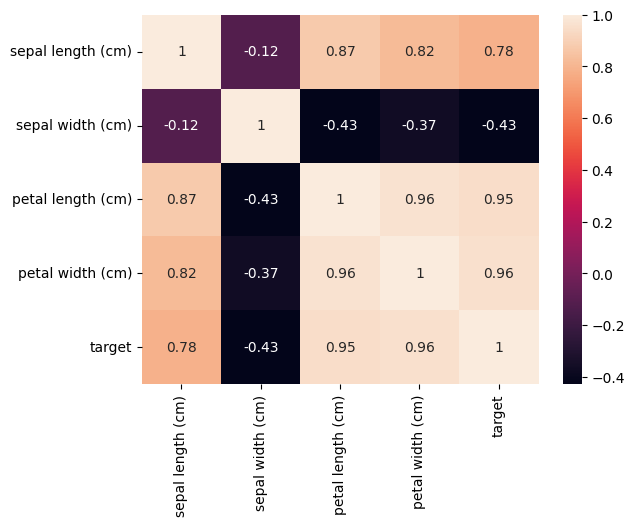

In [ ]:
sns.heatmap(df.corr(), annot=True)

## 4. Target Variable Preprocessing

<Axes: xlabel='count', ylabel='target'>

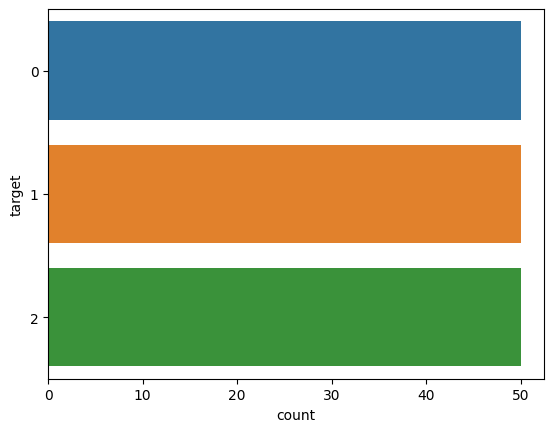

In [ ]:
sns.countplot(data=df, y='target')

In [ ]:
df.target.isnull().sum()

0

## 5. Handling Missing Values

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

<Axes: >

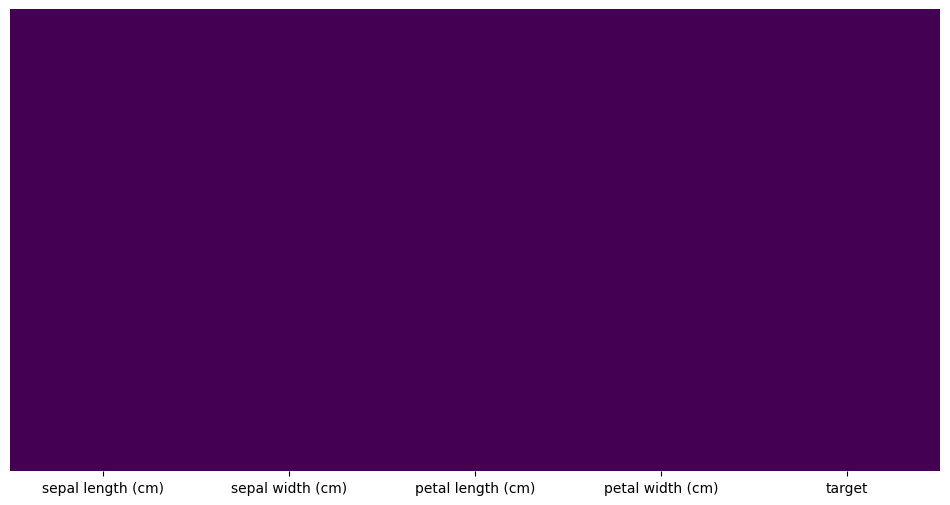

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 6. Handling Categorical features

In [ ]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

## 7. Check Correlations

In [ ]:
df.corr()[['target']].style.background_gradient(cmap='Greens')

,target
sepal length (cm),0.782561
sepal width (cm),-0.426658
petal length (cm),0.949035
petal width (cm),0.956547
target,1.000000


## 8. Train_Test_Split

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
y = df['target']
X = df.drop(columns=['target'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 9. Scale the Data

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

> **KNN**

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

> **Support Vector Classifier**

In [ ]:
SVC_model = SVC(kernel='rbf', random_state=0)
SVC_model.fit(X_train, y_train)

SVC(random_state=0)

> **Naive Bayes**

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

> **Decision Tree Classifier**

In [ ]:
DTC_model = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

> **Random Forest Classifier**

In [ ]:
RFC_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
RFC_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## 10. Predict, Evaluate

> **KNN**

In [ ]:
predictions = KNN_model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
print(confusion_matrix(y_test, predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


> **Support Vector Classifier**

In [ ]:
predictions = SVC_model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
print(confusion_matrix(y_test, predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


> **Naive Bayes**

In [ ]:
predictions = NB_model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
print(confusion_matrix(y_test, predictions))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


> **Decision Tree Classifier**

In [ ]:
predictions = DTC_model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
print(confusion_matrix(y_test, predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  2 11]]


> **Random Forest Classifier**

In [ ]:
predictions = RFC_model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
print(confusion_matrix(y_test, predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
